### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head(2)

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN', 'NAME'], axis= 1, inplace = True)
application_df.head(2)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_counts = application_df["APPLICATION_TYPE"].value_counts()
app_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

Text(0.5, 1.0, 'Density Types of Applications')

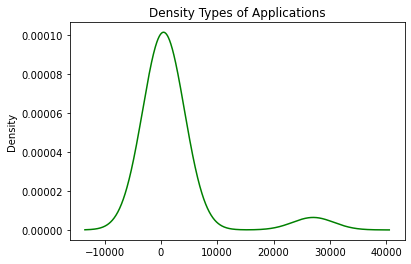

In [5]:
# Visualize the value counts of APPLICATION_TYPE
app_counts.plot.density(color="green")
plt.title('Density Types of Applications')

In [6]:
# Determine which values to replace if counts are less than 5000
replace_application = list(app_counts[app_counts < 100].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df["CLASSIFICATION"].value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

Text(0.5, 1.0, 'Density Types of Classifications')

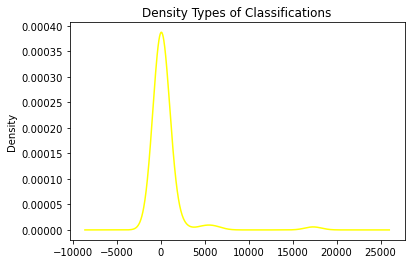

In [8]:
# Visualize the value counts of CLASSIFICATION
class_counts.plot.density(color="yellow")
plt.title('Density Types of Classifications')

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_counts[class_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cats = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cats

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cats]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cats)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_T9,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cats,1)
application_df.head()

C:\Users\menon\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

C:\Users\menon\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 360       
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 411
Trainable params: 411
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [17]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [19]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 5:32 - loss: 0.7237 - accuracy: 0.4375
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 10/804 [..............................] - ETA: 4s - loss: 0.7235 - accuracy: 0.5875  
Epoch 1: saving model to checkpoints\weights.01.hdf5
 15/804 [..............................] - ETA: 5s - loss: 0.7136 - accuracy: 0.5917
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 25/804 [..............................] - ETA: 6s - loss: 0.7157 - accuracy: 0.5750
Epoch 1: saving model to checkpoints\weights.01.hdf5
 30/804 [>.............................] - ETA: 6s - loss: 0.7115 - accuracy: 0.5719
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 40/804 [>.............................] - ETA: 6s - loss: 0.7078 - accuracy: 0.5633
Epoch 1: saving model to checkpoints\weights.01

385/804 [=============>................] - ETA: 3s - loss: 0.6325 - accuracy: 0.6713
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
395/804 [=============>................] - ETA: 3s - loss: 0.6314 - accuracy: 0.6723
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
405/804 [==============>...............] - ETA: 3s - loss: 0.6301 - accuracy: 0.6731
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
415/804 [==============>...............] - ETA: 3s - loss: 0.6294 - accuracy: 0.6738
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
425/804 [==============>...............] - ETA: 3s - loss: 0.6288 - accuracy: 0.6748
Epoch 1: saving model to checkpoints\weights.01.hdf5
431/804 [===============>..............] - ETA: 3s - loss: 0.6281 - accuracy: 0.6752
Epoch 1: 

366/804 [============>.................] - ETA: 3s - loss: 0.5705 - accuracy: 0.7208
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
376/804 [=============>................] - ETA: 3s - loss: 0.5701 - accuracy: 0.7208
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
386/804 [=============>................] - ETA: 3s - loss: 0.5698 - accuracy: 0.7209
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
396/804 [=============>................] - ETA: 3s - loss: 0.5701 - accuracy: 0.7203
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
409/804 [==============>...............] - ETA: 3s - loss: 0.5704 - accuracy: 0.7201
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
416/804 [==============>...............]


Epoch 2: saving model to checkpoints\weights.02.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.5680 - accuracy: 0.7226
Epoch 2: saving model to checkpoints\weights.02.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.5681 - accuracy: 0.7226
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.5684 - accuracy: 0.7226
Epoch 2: saving model to checkpoints\weights.02.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.5682 - accuracy: 0.7226
Epoch 2: saving model to checkpoints\weights.02.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.5684 - accuracy: 0.7223
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
804/804 [==============================] - 7s 8ms/step - loss: 0.5683 - accuracy: 0.7225
Epoch 3/100
  1/804 [..............................] - ETA:

693/804 [========================>.....] - ETA: 1s - loss: 0.5611 - accuracy: 0.7254
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.5618 - accuracy: 0.7247
Epoch 3: saving model to checkpoints\weights.03.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.5620 - accuracy: 0.7246
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.5624 - accuracy: 0.7241
Epoch 3: saving model to checkpoints\weights.03.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.5624 - accuracy: 0.7241
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.5621 - accuracy: 0.7243
Epoch 3: saving model to checkpoints\weights.03.hdf5
737/804 [=

628/804 [======================>.......] - ETA: 1s - loss: 0.5617 - accuracy: 0.7223
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
638/804 [======================>.......] - ETA: 1s - loss: 0.5616 - accuracy: 0.7223
Epoch 4: saving model to checkpoints\weights.04.hdf5
644/804 [=======================>......] - ETA: 1s - loss: 0.5617 - accuracy: 0.7221
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
653/804 [=======================>......] - ETA: 1s - loss: 0.5615 - accuracy: 0.7223
Epoch 4: saving model to checkpoints\weights.04.hdf5
658/804 [=======================>......] - ETA: 1s - loss: 0.5612 - accuracy: 0.7224
Epoch 4: saving model to checkpoints\weights.04.hdf5
663/804 [=======================>......] - ETA: 1s - loss: 0.5612 - accuracy: 0.7225
Epoch 4: saving model to checkpoints\weights.04.hdf5
670/804 [========================>.....] - ETA: 1s - loss: 0.561

560/804 [===================>..........] - ETA: 2s - loss: 0.5550 - accuracy: 0.7289
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
569/804 [====================>.........] - ETA: 2s - loss: 0.5550 - accuracy: 0.7290
Epoch 5: saving model to checkpoints\weights.05.hdf5
574/804 [====================>.........] - ETA: 2s - loss: 0.5546 - accuracy: 0.7292
Epoch 5: saving model to checkpoints\weights.05.hdf5
579/804 [====================>.........] - ETA: 2s - loss: 0.5547 - accuracy: 0.7292
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.5553 - accuracy: 0.7285
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.5557 - accuracy: 0.7285
Epoch 5: saving model to checkpoints\weights.05.hdf5
604/804 [=

143/804 [====>.........................] - ETA: 5s - loss: 0.5521 - accuracy: 0.7306
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
150/804 [====>.........................] - ETA: 5s - loss: 0.5510 - accuracy: 0.7325
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
160/804 [====>.........................] - ETA: 5s - loss: 0.5536 - accuracy: 0.7299
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
170/804 [=====>........................] - ETA: 4s - loss: 0.5529 - accuracy: 0.7303
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
180/804 [=====>........................] - ETA: 4s - loss: 0.5513 - accuracy: 0.7325
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
190/804 [======>.......................]


Epoch 7: saving model to checkpoints\weights.07.hdf5
146/804 [====>.........................] - ETA: 4s - loss: 0.5585 - accuracy: 0.7262
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
156/804 [====>.........................] - ETA: 4s - loss: 0.5601 - accuracy: 0.7260
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
166/804 [=====>........................] - ETA: 4s - loss: 0.5594 - accuracy: 0.7272
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
176/804 [=====>........................] - ETA: 4s - loss: 0.5586 - accuracy: 0.7266
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
186/804 [=====>........................] - ETA: 4s - loss: 0.5575 - accuracy: 0.7280
Epoch 7: saving model to checkpoints\weights.07.hdf5
191/804 [======>.......................]


Epoch 7: saving model to checkpoints\weights.07.hdf5
541/804 [===================>..........] - ETA: 2s - loss: 0.5554 - accuracy: 0.7283
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
551/804 [===================>..........] - ETA: 1s - loss: 0.5545 - accuracy: 0.7293
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
561/804 [===================>..........] - ETA: 1s - loss: 0.5547 - accuracy: 0.7288
Epoch 7: saving model to checkpoints\weights.07.hdf5
567/804 [====================>.........] - ETA: 1s - loss: 0.5545 - accuracy: 0.7288
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
576/804 [====================>.........] - ETA: 1s - loss: 0.5550 - accuracy: 0.7285
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
586/804 [====================>.........]

497/804 [=================>............] - ETA: 2s - loss: 0.5526 - accuracy: 0.7296
Epoch 8: saving model to checkpoints\weights.08.hdf5
504/804 [=================>............] - ETA: 2s - loss: 0.5530 - accuracy: 0.7292
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
512/804 [==================>...........] - ETA: 2s - loss: 0.5529 - accuracy: 0.7296
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
522/804 [==================>...........] - ETA: 2s - loss: 0.5532 - accuracy: 0.7292
Epoch 8: saving model to checkpoints\weights.08.hdf5
530/804 [==================>...........] - ETA: 2s - loss: 0.5530 - accuracy: 0.7293
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
537/804 [===================>..........] - ETA: 2s - loss: 0.5537 - accuracy: 0.7285
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: 


Epoch 9: saving model to checkpoints\weights.09.hdf5
 93/804 [==>...........................] - ETA: 5s - loss: 0.5449 - accuracy: 0.7339
Epoch 9: saving model to checkpoints\weights.09.hdf5
 98/804 [==>...........................] - ETA: 5s - loss: 0.5447 - accuracy: 0.7341
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
108/804 [===>..........................] - ETA: 5s - loss: 0.5466 - accuracy: 0.7326
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
118/804 [===>..........................] - ETA: 5s - loss: 0.5436 - accuracy: 0.7352
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
128/804 [===>..........................] - ETA: 5s - loss: 0.5449 - accuracy: 0.7346
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
138/804 [====>.........................]

483/804 [=================>............] - ETA: 2s - loss: 0.5527 - accuracy: 0.7299
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
493/804 [=================>............] - ETA: 2s - loss: 0.5531 - accuracy: 0.7301
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
503/804 [=================>............] - ETA: 2s - loss: 0.5534 - accuracy: 0.7299
Epoch 9: saving model to checkpoints\weights.09.hdf5
508/804 [=================>............] - ETA: 2s - loss: 0.5532 - accuracy: 0.7303
Epoch 9: saving model to checkpoints\weights.09.hdf5
513/804 [==================>...........] - ETA: 2s - loss: 0.5534 - accuracy: 0.7300
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
523/804 [==================>...........] - ETA: 2s - loss: 0.5528 - accuracy: 0.7308
Epoch 9: saving model to checkpoints\weights.09.hdf5
528/804 [=

439/804 [===============>..............] - ETA: 3s - loss: 0.5524 - accuracy: 0.7304
Epoch 10: saving model to checkpoints\weights.10.hdf5
444/804 [===============>..............] - ETA: 3s - loss: 0.5526 - accuracy: 0.7297
Epoch 10: saving model to checkpoints\weights.10.hdf5
453/804 [===============>..............] - ETA: 2s - loss: 0.5525 - accuracy: 0.7296
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
459/804 [================>.............] - ETA: 2s - loss: 0.5524 - accuracy: 0.7301
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
469/804 [================>.............] - ETA: 2s - loss: 0.5526 - accuracy: 0.7299
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
479/804 [================>.............] - ETA: 2s - loss: 0.5523 - accuracy: 0.7304
Epoch 10: saving model to checkpoints\weights.10.hdf5




Epoch 11: saving model to checkpoints\weights.11.hdf5
400/804 [=============>................] - ETA: 3s - loss: 0.5475 - accuracy: 0.7369
Epoch 11: saving model to checkpoints\weights.11.hdf5
405/804 [==============>...............] - ETA: 3s - loss: 0.5479 - accuracy: 0.7367
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
415/804 [==============>...............] - ETA: 3s - loss: 0.5487 - accuracy: 0.7359
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
425/804 [==============>...............] - ETA: 2s - loss: 0.5491 - accuracy: 0.7356
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
435/804 [===============>..............] - ETA: 2s - loss: 0.5488 - accuracy: 0.7354
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to che


Epoch 11: saving model to checkpoints\weights.11.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.5501 - accuracy: 0.7316
Epoch 11: saving model to checkpoints\weights.11.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.5503 - accuracy: 0.7316
Epoch 11: saving model to checkpoints\weights.11.hdf5
804/804 [==============================] - 6s 8ms/step - loss: 0.5508 - accuracy: 0.7311
Epoch 12/100

Epoch 12: saving model to checkpoints\weights.12.hdf5
  1/804 [..............................] - ETA: 11s - loss: 0.5064 - accuracy: 0.7500
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
 11/804 [..............................] - ETA: 5s - loss: 0.5541 - accuracy: 0.7244 
Epoch 12: saving model to checkpoints\weights.12.hdf5
 16/804 [..............................] - ETA: 6s - loss: 0.5643 - accuracy: 0.7188
Epoch 12: saving model to checkpoints\weights.12.hdf5
 24/804 [...........................

361/804 [============>.................] - ETA: 3s - loss: 0.5540 - accuracy: 0.7281
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
371/804 [============>.................] - ETA: 3s - loss: 0.5533 - accuracy: 0.7291
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
381/804 [=============>................] - ETA: 3s - loss: 0.5528 - accuracy: 0.7296
Epoch 12: saving model to checkpoints\weights.12.hdf5
386/804 [=============>................] - ETA: 3s - loss: 0.5527 - accuracy: 0.7299
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
396/804 [=============>................] - ETA: 3s - loss: 0.5517 - accuracy: 0.7306
Epoch 12: saving model to checkpoints\weights.12.hdf5
401/804 [=============>................] - ETA: 3s - loss: 0.5518 - accuracy: 0.7304
Epoch 12: saving model to checkpoints\weights.12.hdf5



756/804 [===========================>..] - ETA: 0s - loss: 0.5501 - accuracy: 0.7321
Epoch 12: saving model to checkpoints\weights.12.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.5499 - accuracy: 0.7323
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.5505 - accuracy: 0.7318
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.5502 - accuracy: 0.7320
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.5501 - accuracy: 0.7319
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
804/804 [==============================] - 7s 8ms/step - loss: 0.5503 - accuracy: 0.7

347/804 [===========>..................] - ETA: 3s - loss: 0.5466 - accuracy: 0.7357
Epoch 13: saving model to checkpoints\weights.13.hdf5
352/804 [============>.................] - ETA: 3s - loss: 0.5463 - accuracy: 0.7361
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
362/804 [============>.................] - ETA: 3s - loss: 0.5467 - accuracy: 0.7354
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
372/804 [============>.................] - ETA: 3s - loss: 0.5470 - accuracy: 0.7355
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
382/804 [=============>................] - ETA: 3s - loss: 0.5478 - accuracy: 0.7349
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
392/804 [=============>................] - ETA: 3s - loss: 0.5480 - accuracy: 0.7351


745/804 [==========================>...] - ETA: 0s - loss: 0.5509 - accuracy: 0.7311
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.5505 - accuracy: 0.7315
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.5503 - accuracy: 0.7317
Epoch 13: saving model to checkpoints\weights.13.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.5500 - accuracy: 0.7319
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.5499 - accuracy: 0.7319
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.5502 - accuracy: 0.7313


708/804 [=========================>....] - ETA: 0s - loss: 0.5489 - accuracy: 0.7332
Epoch 14: saving model to checkpoints\weights.14.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.5491 - accuracy: 0.7330
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.5489 - accuracy: 0.7331
Epoch 14: saving model to checkpoints\weights.14.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.5492 - accuracy: 0.7329
Epoch 14: saving model to checkpoints\weights.14.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.5489 - accuracy: 0.7331
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.5487 - accuracy: 0.7334
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
7


Epoch 15: saving model to checkpoints\weights.15.hdf5
304/804 [==========>...................] - ETA: 3s - loss: 0.5539 - accuracy: 0.7310
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
314/804 [==========>...................] - ETA: 3s - loss: 0.5545 - accuracy: 0.7309
Epoch 15: saving model to checkpoints\weights.15.hdf5
321/804 [==========>...................] - ETA: 3s - loss: 0.5557 - accuracy: 0.7300
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
329/804 [===========>..................] - ETA: 3s - loss: 0.5564 - accuracy: 0.7299
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
339/804 [===========>..................] - ETA: 3s - loss: 0.5561 - accuracy: 0.7303
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
349/804 [============>........

690/804 [========================>.....] - ETA: 0s - loss: 0.5509 - accuracy: 0.7308
Epoch 15: saving model to checkpoints\weights.15.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.5511 - accuracy: 0.7308
Epoch 15: saving model to checkpoints\weights.15.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.5511 - accuracy: 0.7307
Epoch 15: saving model to checkpoints\weights.15.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.5510 - accuracy: 0.7309
Epoch 15: saving model to checkpoints\weights.15.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.5513 - accuracy: 0.7307
Epoch 15: saving model to checkpoints\weights.15.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.5510 - accuracy: 0.7310
Epoch 15: saving model to checkpoints\weights.15.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.5508 - accuracy: 0.7312
Epoch 15: saving model to checkpoints\weights.15.hdf5
724/804 [==================

630/804 [======================>.......] - ETA: 1s - loss: 0.5479 - accuracy: 0.7341
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
640/804 [======================>.......] - ETA: 1s - loss: 0.5479 - accuracy: 0.7342
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
650/804 [=======================>......] - ETA: 1s - loss: 0.5483 - accuracy: 0.7334
Epoch 16: saving model to checkpoints\weights.16.hdf5
658/804 [=======================>......] - ETA: 1s - loss: 0.5487 - accuracy: 0.7333
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
665/804 [=======================>......] - ETA: 1s - loss: 0.5484 - accuracy: 0.7336
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
675/804 [========================>.....] - ETA: 1s - loss: 0.5484 - accuracy: 0.7335


606/804 [=====================>........] - ETA: 1s - loss: 0.5493 - accuracy: 0.7335
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
616/804 [=====================>........] - ETA: 1s - loss: 0.5496 - accuracy: 0.7333
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
626/804 [======================>.......] - ETA: 1s - loss: 0.5500 - accuracy: 0.7328
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
636/804 [======================>.......] - ETA: 1s - loss: 0.5493 - accuracy: 0.7335
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
651/804 [=======================>......] - ETA: 1s - loss: 0.5489 - accuracy: 0.7338
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to che

197/804 [======>.......................] - ETA: 5s - loss: 0.5503 - accuracy: 0.7357
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
207/804 [======>.......................] - ETA: 5s - loss: 0.5499 - accuracy: 0.7364
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
217/804 [=======>......................] - ETA: 5s - loss: 0.5515 - accuracy: 0.7363
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
227/804 [=======>......................] - ETA: 4s - loss: 0.5515 - accuracy: 0.7361
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
237/804 [=======>......................] - ETA: 4s - loss: 0.5509 - accuracy: 0.7358
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
247/804 [========>............

592/804 [=====================>........] - ETA: 1s - loss: 0.5487 - accuracy: 0.7337
Epoch 18: saving model to checkpoints\weights.18.hdf5
597/804 [=====================>........] - ETA: 1s - loss: 0.5494 - accuracy: 0.7330
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
607/804 [=====================>........] - ETA: 1s - loss: 0.5502 - accuracy: 0.7325
Epoch 18: saving model to checkpoints\weights.18.hdf5
612/804 [=====================>........] - ETA: 1s - loss: 0.5505 - accuracy: 0.7324
Epoch 18: saving model to checkpoints\weights.18.hdf5
617/804 [======================>.......] - ETA: 1s - loss: 0.5506 - accuracy: 0.7322
Epoch 18: saving model to checkpoints\weights.18.hdf5
622/804 [======================>.......] - ETA: 1s - loss: 0.5504 - accuracy: 0.7321
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
632/804 [======================>.......] - ETA: 1s - los


Epoch 19: saving model to checkpoints\weights.19.hdf5
553/804 [===================>..........] - ETA: 2s - loss: 0.5466 - accuracy: 0.7350
Epoch 19: saving model to checkpoints\weights.19.hdf5
558/804 [===================>..........] - ETA: 2s - loss: 0.5466 - accuracy: 0.7349
Epoch 19: saving model to checkpoints\weights.19.hdf5
563/804 [====================>.........] - ETA: 2s - loss: 0.5468 - accuracy: 0.7348
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 0.5464 - accuracy: 0.7351
Epoch 19: saving model to checkpoints\weights.19.hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.5464 - accuracy: 0.7351
Epoch 19: saving model to checkpoints\weights.19.hdf5
583/804 [====================>.........] - ETA: 1s - loss: 0.5465 - accuracy: 0.7350
Epoch 19: saving model to checkpoints\weights.19.hdf5
588/804 [====================>.........] - ETA: 1s - los


Epoch 20: saving model to checkpoints\weights.20.hdf5
519/804 [==================>...........] - ETA: 2s - loss: 0.5480 - accuracy: 0.7330
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
529/804 [==================>...........] - ETA: 2s - loss: 0.5485 - accuracy: 0.7323
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
539/804 [===================>..........] - ETA: 2s - loss: 0.5483 - accuracy: 0.7324
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
549/804 [===================>..........] - ETA: 2s - loss: 0.5474 - accuracy: 0.7332
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
559/804 [===================>..........] - ETA: 2s - loss: 0.5475 - accuracy: 0.7331
Epoch 20: saving model to checkpoints\weights.20.hdf5
564/804 [====================>

110/804 [===>..........................] - ETA: 5s - loss: 0.5465 - accuracy: 0.7330
Epoch 21: saving model to checkpoints\weights.21.hdf5
115/804 [===>..........................] - ETA: 5s - loss: 0.5483 - accuracy: 0.7312
Epoch 21: saving model to checkpoints\weights.21.hdf5
120/804 [===>..........................] - ETA: 5s - loss: 0.5480 - accuracy: 0.7312
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
130/804 [===>..........................] - ETA: 5s - loss: 0.5442 - accuracy: 0.7332
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
140/804 [====>.........................] - ETA: 5s - loss: 0.5420 - accuracy: 0.7355
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
150/804 [====>.........................] - ETA: 5s - loss: 0.5474 - accuracy: 0.7331
Epoch 21: saving model to checkpoints\weights.21.hdf5




Epoch 21: saving model to checkpoints\weights.21.hdf5
505/804 [=================>............] - ETA: 2s - loss: 0.5444 - accuracy: 0.7370
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
515/804 [==================>...........] - ETA: 2s - loss: 0.5449 - accuracy: 0.7364
Epoch 21: saving model to checkpoints\weights.21.hdf5
523/804 [==================>...........] - ETA: 2s - loss: 0.5454 - accuracy: 0.7360
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
530/804 [==================>...........] - ETA: 2s - loss: 0.5456 - accuracy: 0.7361
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
540/804 [===================>..........] - ETA: 2s - loss: 0.5456 - accuracy: 0.7362
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
550/804 [===================>.


Epoch 22: saving model to checkpoints\weights.22.hdf5
 86/804 [==>...........................] - ETA: 6s - loss: 0.5375 - accuracy: 0.7413
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
 96/804 [==>...........................] - ETA: 5s - loss: 0.5370 - accuracy: 0.7412
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
106/804 [==>...........................] - ETA: 5s - loss: 0.5415 - accuracy: 0.7391
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
116/804 [===>..........................] - ETA: 5s - loss: 0.5447 - accuracy: 0.7368
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
126/804 [===>..........................] - ETA: 5s - loss: 0.5464 - accuracy: 0.7351
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to che


Epoch 22: saving model to checkpoints\weights.22.hdf5
476/804 [================>.............] - ETA: 2s - loss: 0.5458 - accuracy: 0.7365
Epoch 22: saving model to checkpoints\weights.22.hdf5
485/804 [=================>............] - ETA: 2s - loss: 0.5455 - accuracy: 0.7367
Epoch 22: saving model to checkpoints\weights.22.hdf5
486/804 [=================>............] - ETA: 2s - loss: 0.5454 - accuracy: 0.7369
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
496/804 [=================>............] - ETA: 2s - loss: 0.5461 - accuracy: 0.7363
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
506/804 [=================>............] - ETA: 2s - loss: 0.5467 - accuracy: 0.7357
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
516/804 [==================>...........] - ETA: 2s - loss: 0.5466 - accuracy: 0.7356


 62/804 [=>............................] - ETA: 6s - loss: 0.5561 - accuracy: 0.7288
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
 72/804 [=>............................] - ETA: 5s - loss: 0.5613 - accuracy: 0.7292
Epoch 23: saving model to checkpoints\weights.23.hdf5
 81/804 [==>...........................] - ETA: 5s - loss: 0.5622 - accuracy: 0.7257
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
 89/804 [==>...........................] - ETA: 5s - loss: 0.5593 - accuracy: 0.7293
Epoch 23: saving model to checkpoints\weights.23.hdf5
 96/804 [==>...........................] - ETA: 5s - loss: 0.5561 - accuracy: 0.7314
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
102/804 [==>...........................] - ETA: 5s - loss: 0.5549 - accuracy: 0.7325
Epoch 23: saving model to checkpoints\weights.23.hdf5




Epoch 23: saving model to checkpoints\weights.23.hdf5
432/804 [===============>..............] - ETA: 3s - loss: 0.5514 - accuracy: 0.7326
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
442/804 [===============>..............] - ETA: 3s - loss: 0.5509 - accuracy: 0.7332
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
452/804 [===============>..............] - ETA: 3s - loss: 0.5504 - accuracy: 0.7338
Epoch 23: saving model to checkpoints\weights.23.hdf5
460/804 [================>.............] - ETA: 3s - loss: 0.5500 - accuracy: 0.7342
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
467/804 [================>.............] - ETA: 3s - loss: 0.5495 - accuracy: 0.7347
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
477/804 [================>....


Epoch 24: saving model to checkpoints\weights.24.hdf5
  8/804 [..............................] - ETA: 8s - loss: 0.5954 - accuracy: 0.7148
Epoch 24: saving model to checkpoints\weights.24.hdf5
 13/804 [..............................] - ETA: 8s - loss: 0.5891 - accuracy: 0.7091
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
 23/804 [..............................] - ETA: 6s - loss: 0.5674 - accuracy: 0.7228
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
 33/804 [>.............................] - ETA: 6s - loss: 0.5672 - accuracy: 0.7197
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
 43/804 [>.............................] - ETA: 6s - loss: 0.5553 - accuracy: 0.7362
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
 53/804 [>....................


Epoch 24: saving model to checkpoints\weights.24.hdf5
398/804 [=============>................] - ETA: 3s - loss: 0.5520 - accuracy: 0.7312
Epoch 24: saving model to checkpoints\weights.24.hdf5
403/804 [==============>...............] - ETA: 3s - loss: 0.5517 - accuracy: 0.7314
Epoch 24: saving model to checkpoints\weights.24.hdf5
412/804 [==============>...............] - ETA: 3s - loss: 0.5514 - accuracy: 0.7319
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
418/804 [==============>...............] - ETA: 3s - loss: 0.5513 - accuracy: 0.7318
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
428/804 [==============>...............] - ETA: 3s - loss: 0.5515 - accuracy: 0.7317
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
438/804 [===============>..............] - ETA: 3s - loss: 0.5512 - accuracy: 0.7312


339/804 [===========>..................] - ETA: 3s - loss: 0.5472 - accuracy: 0.7364
Epoch 25: saving model to checkpoints\weights.25.hdf5
348/804 [===========>..................] - ETA: 3s - loss: 0.5463 - accuracy: 0.7370
Epoch 25: saving model to checkpoints\weights.25.hdf5
349/804 [============>.................] - ETA: 3s - loss: 0.5459 - accuracy: 0.7372
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
359/804 [============>.................] - ETA: 3s - loss: 0.5463 - accuracy: 0.7371
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
369/804 [============>.................] - ETA: 3s - loss: 0.5459 - accuracy: 0.7373
Epoch 25: saving model to checkpoints\weights.25.hdf5
374/804 [============>.................] - ETA: 3s - loss: 0.5458 - accuracy: 0.7372
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
3

317/804 [==========>...................] - ETA: 3s - loss: 0.5465 - accuracy: 0.7354
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
325/804 [===========>..................] - ETA: 3s - loss: 0.5471 - accuracy: 0.7345
Epoch 26: saving model to checkpoints\weights.26.hdf5
331/804 [===========>..................] - ETA: 3s - loss: 0.5466 - accuracy: 0.7348
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
340/804 [===========>..................] - ETA: 3s - loss: 0.5468 - accuracy: 0.7351
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
350/804 [============>.................] - ETA: 3s - loss: 0.5471 - accuracy: 0.7344
Epoch 26: saving model to checkpoints\weights.26.hdf5
355/804 [============>.................] - ETA: 3s - loss: 0.5474 - accuracy: 0.7336
Epoch 26: saving model to checkpoints\weights.26.hdf5



282/804 [=========>....................] - ETA: 4s - loss: 0.5458 - accuracy: 0.7355
Epoch 27: saving model to checkpoints\weights.27.hdf5
289/804 [=========>....................] - ETA: 4s - loss: 0.5447 - accuracy: 0.7368
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
296/804 [==========>...................] - ETA: 4s - loss: 0.5460 - accuracy: 0.7360
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
306/804 [==========>...................] - ETA: 4s - loss: 0.5457 - accuracy: 0.7363
Epoch 27: saving model to checkpoints\weights.27.hdf5
312/804 [==========>...................] - ETA: 4s - loss: 0.5460 - accuracy: 0.7359
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
321/804 [==========>...................] - ETA: 4s - loss: 0.5480 - accuracy: 0.7344
Epoch 27: saving model to checkpoints\weights.27.hdf5
3


Epoch 28: saving model to checkpoints\weights.28.hdf5
257/804 [========>.....................] - ETA: 4s - loss: 0.5467 - accuracy: 0.7347
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
267/804 [========>.....................] - ETA: 4s - loss: 0.5460 - accuracy: 0.7350
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
277/804 [=========>....................] - ETA: 4s - loss: 0.5456 - accuracy: 0.7358
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
287/804 [=========>....................] - ETA: 3s - loss: 0.5452 - accuracy: 0.7363
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
297/804 [==========>...................] - ETA: 3s - loss: 0.5449 - accuracy: 0.7364
Epoch 28: saving model to checkpoints\weights.28.hdf5
302/804 [==========>..........

203/804 [======>.......................] - ETA: 5s - loss: 0.5439 - accuracy: 0.7349
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
213/804 [======>.......................] - ETA: 5s - loss: 0.5470 - accuracy: 0.7321
Epoch 29: saving model to checkpoints\weights.29.hdf5
222/804 [=======>......................] - ETA: 4s - loss: 0.5472 - accuracy: 0.7316
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
228/804 [=======>......................] - ETA: 4s - loss: 0.5467 - accuracy: 0.7319
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
238/804 [=======>......................] - ETA: 4s - loss: 0.5458 - accuracy: 0.7333
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
248/804 [========>.....................] - ETA: 4s - loss: 0.5448 - accuracy: 0.7345



Epoch 29: saving model to checkpoints\weights.29.hdf5
618/804 [======================>.......] - ETA: 1s - loss: 0.5457 - accuracy: 0.7347
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
628/804 [======================>.......] - ETA: 1s - loss: 0.5460 - accuracy: 0.7344
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
638/804 [======================>.......] - ETA: 1s - loss: 0.5459 - accuracy: 0.7342
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
648/804 [=======================>......] - ETA: 1s - loss: 0.5458 - accuracy: 0.7342
Epoch 29: saving model to checkpoints\weights.29.hdf5
653/804 [=======================>......] - ETA: 1s - loss: 0.5463 - accuracy: 0.7338
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
663/804 [=====================

539/804 [===================>..........] - ETA: 3s - loss: 0.5464 - accuracy: 0.7361
Epoch 30: saving model to checkpoints\weights.30.hdf5
544/804 [===================>..........] - ETA: 3s - loss: 0.5456 - accuracy: 0.7367
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
554/804 [===================>..........] - ETA: 3s - loss: 0.5451 - accuracy: 0.7370
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
564/804 [====================>.........] - ETA: 3s - loss: 0.5455 - accuracy: 0.7367
Epoch 30: saving model to checkpoints\weights.30.hdf5
569/804 [====================>.........] - ETA: 3s - loss: 0.5460 - accuracy: 0.7364
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
579/804 [====================>.........] - ETA: 3s - loss: 0.5467 - accuracy: 0.7356
Epoch 30: saving model to checkpoints\weights.30.hdf5
5

100/804 [==>...........................] - ETA: 6s - loss: 0.5438 - accuracy: 0.7391
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
110/804 [===>..........................] - ETA: 6s - loss: 0.5438 - accuracy: 0.7392
Epoch 31: saving model to checkpoints\weights.31.hdf5
115/804 [===>..........................] - ETA: 6s - loss: 0.5445 - accuracy: 0.7375
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
125/804 [===>..........................] - ETA: 5s - loss: 0.5473 - accuracy: 0.7337
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
135/804 [====>.........................] - ETA: 5s - loss: 0.5460 - accuracy: 0.7356
Epoch 31: saving model to checkpoints\weights.31.hdf5
140/804 [====>.........................] - ETA: 6s - loss: 0.5461 - accuracy: 0.7348
Epoch 31: saving model to checkpoints\weights.31.hdf5
1

 56/804 [=>............................] - ETA: 6s - loss: 0.5446 - accuracy: 0.7327
Epoch 32: saving model to checkpoints\weights.32.hdf5
 61/804 [=>............................] - ETA: 6s - loss: 0.5478 - accuracy: 0.7316
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
 71/804 [=>............................] - ETA: 6s - loss: 0.5494 - accuracy: 0.7324
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
 81/804 [==>...........................] - ETA: 7s - loss: 0.5461 - accuracy: 0.7330
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
 91/804 [==>...........................] - ETA: 6s - loss: 0.5449 - accuracy: 0.7339
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
101/804 [==>...........................] - ETA: 6s - loss: 0.5504 - accuracy: 0.7302



Epoch 33: saving model to checkpoints\weights.33.hdf5
  8/804 [..............................] - ETA: 5s - loss: 0.5388 - accuracy: 0.7500
Epoch 33: saving model to checkpoints\weights.33.hdf5
 12/804 [..............................] - ETA: 13s - loss: 0.5289 - accuracy: 0.7526
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
 22/804 [..............................] - ETA: 9s - loss: 0.5374 - accuracy: 0.7401 
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
 32/804 [>.............................] - ETA: 8s - loss: 0.5366 - accuracy: 0.7422
Epoch 33: saving model to checkpoints\weights.33.hdf5
 37/804 [>.............................] - ETA: 8s - loss: 0.5352 - accuracy: 0.7441
Epoch 33: saving model to checkpoints\weights.33.hdf5
 42/804 [>.............................] - ETA: 8s - loss: 0.5388 - accuracy: 0.7418
Epoch 33: saving model to checkpoints\weights.33.hdf5

392/804 [=============>................] - ETA: 3s - loss: 0.5404 - accuracy: 0.7365
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
402/804 [==============>...............] - ETA: 3s - loss: 0.5403 - accuracy: 0.7370
Epoch 33: saving model to checkpoints\weights.33.hdf5
407/804 [==============>...............] - ETA: 3s - loss: 0.5403 - accuracy: 0.7369
Epoch 33: saving model to checkpoints\weights.33.hdf5
412/804 [==============>...............] - ETA: 3s - loss: 0.5407 - accuracy: 0.7365
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
422/804 [==============>...............] - ETA: 3s - loss: 0.5415 - accuracy: 0.7362
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
432/804 [===============>..............] - ETA: 3s - loss: 0.5425 - accuracy: 0.7355
Epoch 33: saving model to checkpoints\weights.33.hdf5



353/804 [============>.................] - ETA: 3s - loss: 0.5493 - accuracy: 0.7296
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
363/804 [============>.................] - ETA: 3s - loss: 0.5484 - accuracy: 0.7307
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
373/804 [============>.................] - ETA: 3s - loss: 0.5493 - accuracy: 0.7306
Epoch 34: saving model to checkpoints\weights.34.hdf5
378/804 [=============>................] - ETA: 3s - loss: 0.5495 - accuracy: 0.7303
Epoch 34: saving model to checkpoints\weights.34.hdf5
383/804 [=============>................] - ETA: 3s - loss: 0.5493 - accuracy: 0.7308
Epoch 34: saving model to checkpoints\weights.34.hdf5
388/804 [=============>................] - ETA: 3s - loss: 0.5507 - accuracy: 0.7296
Epoch 34: saving model to checkpoints\weights.34.hdf5
393/804 [=============>................] - ETA: 3s - los

294/804 [=========>....................] - ETA: 4s - loss: 0.5468 - accuracy: 0.7341
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
304/804 [==========>...................] - ETA: 4s - loss: 0.5458 - accuracy: 0.7340
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
314/804 [==========>...................] - ETA: 4s - loss: 0.5463 - accuracy: 0.7336
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
324/804 [===========>..................] - ETA: 4s - loss: 0.5466 - accuracy: 0.7329
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
334/804 [===========>..................] - ETA: 4s - loss: 0.5460 - accuracy: 0.7336
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
344/804 [===========>.........

265/804 [========>.....................] - ETA: 4s - loss: 0.5459 - accuracy: 0.7387
Epoch 36: saving model to checkpoints\weights.36.hdf5
274/804 [=========>....................] - ETA: 4s - loss: 0.5482 - accuracy: 0.7360
Epoch 36: saving model to checkpoints\weights.36.hdf5
275/804 [=========>....................] - ETA: 4s - loss: 0.5488 - accuracy: 0.7357
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
285/804 [=========>....................] - ETA: 4s - loss: 0.5485 - accuracy: 0.7356
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
295/804 [==========>...................] - ETA: 4s - loss: 0.5484 - accuracy: 0.7356
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
305/804 [==========>...................] - ETA: 4s - loss: 0.5476 - accuracy: 0.7360
Epoch 36: saving model to checkpoints\weights.36.hdf5




Epoch 36: saving model to checkpoints\weights.36.hdf5
665/804 [=======================>......] - ETA: 1s - loss: 0.5454 - accuracy: 0.7350
Epoch 36: saving model to checkpoints\weights.36.hdf5
670/804 [========================>.....] - ETA: 1s - loss: 0.5454 - accuracy: 0.7349
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
680/804 [========================>.....] - ETA: 1s - loss: 0.5449 - accuracy: 0.7351
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.5445 - accuracy: 0.7352
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.5442 - accuracy: 0.7355
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
710/804 [=====================

606/804 [=====================>........] - ETA: 1s - loss: 0.5476 - accuracy: 0.7332
Epoch 37: saving model to checkpoints\weights.37.hdf5
615/804 [=====================>........] - ETA: 1s - loss: 0.5473 - accuracy: 0.7335
Epoch 37: saving model to checkpoints\weights.37.hdf5
616/804 [=====================>........] - ETA: 1s - loss: 0.5474 - accuracy: 0.7335
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
626/804 [======================>.......] - ETA: 1s - loss: 0.5464 - accuracy: 0.7341
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
636/804 [======================>.......] - ETA: 1s - loss: 0.5459 - accuracy: 0.7343
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
646/804 [=======================>......] - ETA: 1s - loss: 0.5464 - accuracy: 0.7341
Epoch 37: saving model to checkpoints\weights.37.hdf5



572/804 [====================>.........] - ETA: 1s - loss: 0.5448 - accuracy: 0.7343
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
582/804 [====================>.........] - ETA: 1s - loss: 0.5452 - accuracy: 0.7343
Epoch 38: saving model to checkpoints\weights.38.hdf5
588/804 [====================>.........] - ETA: 1s - loss: 0.5449 - accuracy: 0.7343
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
597/804 [=====================>........] - ETA: 1s - loss: 0.5457 - accuracy: 0.7335
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
607/804 [=====================>........] - ETA: 1s - loss: 0.5457 - accuracy: 0.7337
Epoch 38: saving model to checkpoints\weights.38.hdf5
613/804 [=====================>........] - ETA: 1s - loss: 0.5465 - accuracy: 0.7330
Epoch 38: saving model to checkpoints\weights.38.hdf5



533/804 [==================>...........] - ETA: 2s - loss: 0.5465 - accuracy: 0.7339
Epoch 39: saving model to checkpoints\weights.39.hdf5
538/804 [===================>..........] - ETA: 2s - loss: 0.5465 - accuracy: 0.7340
Epoch 39: saving model to checkpoints\weights.39.hdf5
546/804 [===================>..........] - ETA: 2s - loss: 0.5462 - accuracy: 0.7344
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
553/804 [===================>..........] - ETA: 2s - loss: 0.5460 - accuracy: 0.7343
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
563/804 [====================>.........] - ETA: 2s - loss: 0.5462 - accuracy: 0.7343
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 0.5463 - accuracy: 0.7342
Epoch 39: saving model to checkpoints\weights.39.hdf5
5

512/804 [==================>...........] - ETA: 2s - loss: 0.5451 - accuracy: 0.7354
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
519/804 [==================>...........] - ETA: 2s - loss: 0.5458 - accuracy: 0.7347
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
529/804 [==================>...........] - ETA: 2s - loss: 0.5463 - accuracy: 0.7341
Epoch 40: saving model to checkpoints\weights.40.hdf5
534/804 [==================>...........] - ETA: 2s - loss: 0.5459 - accuracy: 0.7343
Epoch 40: saving model to checkpoints\weights.40.hdf5
543/804 [===================>..........] - ETA: 2s - loss: 0.5456 - accuracy: 0.7344
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
549/804 [===================>..........] - ETA: 1s - loss: 0.5455 - accuracy: 0.7344
Epoch 40: saving model to checkpoints\weights.40.hdf5
5

425/804 [==============>...............] - ETA: 3s - loss: 0.5427 - accuracy: 0.7374
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
435/804 [===============>..............] - ETA: 3s - loss: 0.5429 - accuracy: 0.7371
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
445/804 [===============>..............] - ETA: 3s - loss: 0.5436 - accuracy: 0.7367
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
455/804 [===============>..............] - ETA: 3s - loss: 0.5439 - accuracy: 0.7363
Epoch 41: saving model to checkpoints\weights.41.hdf5
460/804 [================>.............] - ETA: 3s - loss: 0.5443 - accuracy: 0.7357
Epoch 41: saving model to checkpoints\weights.41.hdf5
465/804 [================>.............] - ETA: 3s - loss: 0.5446 - accuracy: 0.7358
Epoch 41: saving model to checkpoints\weights.41.hdf5
4

376/804 [=============>................] - ETA: 3s - loss: 0.5391 - accuracy: 0.7411
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
386/804 [=============>................] - ETA: 3s - loss: 0.5394 - accuracy: 0.7413
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
396/804 [=============>................] - ETA: 3s - loss: 0.5389 - accuracy: 0.7414
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
408/804 [==============>...............] - ETA: 3s - loss: 0.5388 - accuracy: 0.7416
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
416/804 [==============>...............] - ETA: 3s - loss: 0.5390 - accuracy: 0.7416
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
426/804 [==============>......

760/804 [===========================>..] - ETA: 0s - loss: 0.5457 - accuracy: 0.7350
Epoch 42: saving model to checkpoints\weights.42.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.5458 - accuracy: 0.7348
Epoch 42: saving model to checkpoints\weights.42.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.5458 - accuracy: 0.7348
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.5458 - accuracy: 0.7346
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.5457 - accuracy: 0.7348
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.5456 - accuracy: 0.7348
Epoch 42: saving model to checkpoints\weights.42.hdf5
8

726/804 [==========================>...] - ETA: 0s - loss: 0.5459 - accuracy: 0.7339
Epoch 43: saving model to checkpoints\weights.43.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.5458 - accuracy: 0.7340
Epoch 43: saving model to checkpoints\weights.43.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.5464 - accuracy: 0.7335
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.5463 - accuracy: 0.7335
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.5457 - accuracy: 0.7341
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.5460 - accuracy: 0.7340
Epoch 43: saving model to checkpoints\weights.43.hdf5



693/804 [========================>.....] - ETA: 0s - loss: 0.5466 - accuracy: 0.7338
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.5465 - accuracy: 0.7337
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.5466 - accuracy: 0.7337
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.5466 - accuracy: 0.7339
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.5469 - accuracy: 0.7336
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
743/804 [=====================

284/804 [=========>....................] - ETA: 4s - loss: 0.5467 - accuracy: 0.7336
Epoch 45: saving model to checkpoints\weights.45.hdf5
289/804 [=========>....................] - ETA: 4s - loss: 0.5463 - accuracy: 0.7340
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
299/804 [==========>...................] - ETA: 4s - loss: 0.5466 - accuracy: 0.7337
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
309/804 [==========>...................] - ETA: 4s - loss: 0.5464 - accuracy: 0.7331
Epoch 45: saving model to checkpoints\weights.45.hdf5
314/804 [==========>...................] - ETA: 4s - loss: 0.5461 - accuracy: 0.7337
Epoch 45: saving model to checkpoints\weights.45.hdf5
320/804 [==========>...................] - ETA: 4s - loss: 0.5475 - accuracy: 0.7323
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
3

251/804 [========>.....................] - ETA: 5s - loss: 0.5525 - accuracy: 0.7261
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
260/804 [========>.....................] - ETA: 5s - loss: 0.5537 - accuracy: 0.7255
Epoch 46: saving model to checkpoints\weights.46.hdf5
265/804 [========>.....................] - ETA: 5s - loss: 0.5534 - accuracy: 0.7252
Epoch 46: saving model to checkpoints\weights.46.hdf5
270/804 [=========>....................] - ETA: 5s - loss: 0.5525 - accuracy: 0.7262
Epoch 46: saving model to checkpoints\weights.46.hdf5
275/804 [=========>....................] - ETA: 5s - loss: 0.5520 - accuracy: 0.7262
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
285/804 [=========>....................] - ETA: 5s - loss: 0.5523 - accuracy: 0.7260
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
2


Epoch 47: saving model to checkpoints\weights.47.hdf5
231/804 [=======>......................] - ETA: 4s - loss: 0.5471 - accuracy: 0.7325
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
241/804 [=======>......................] - ETA: 4s - loss: 0.5450 - accuracy: 0.7346
Epoch 47: saving model to checkpoints\weights.47.hdf5
249/804 [========>.....................] - ETA: 4s - loss: 0.5447 - accuracy: 0.7351
Epoch 47: saving model to checkpoints\weights.47.hdf5
254/804 [========>.....................] - ETA: 4s - loss: 0.5448 - accuracy: 0.7346
Epoch 47: saving model to checkpoints\weights.47.hdf5
257/804 [========>.....................] - ETA: 4s - loss: 0.5459 - accuracy: 0.7338
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
269/804 [=========>....................] - ETA: 4s - loss: 0.5482 - accuracy: 0.7315
Epoch 47: saving model to checkpoints\weights.47.hdf5




Epoch 47: saving model to checkpoints\weights.47.hdf5
621/804 [======================>.......] - ETA: 1s - loss: 0.5465 - accuracy: 0.7336
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
631/804 [======================>.......] - ETA: 1s - loss: 0.5468 - accuracy: 0.7331
Epoch 47: saving model to checkpoints\weights.47.hdf5
636/804 [======================>.......] - ETA: 1s - loss: 0.5470 - accuracy: 0.7328
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
646/804 [=======================>......] - ETA: 1s - loss: 0.5463 - accuracy: 0.7331
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
656/804 [=======================>......] - ETA: 1s - loss: 0.5463 - accuracy: 0.7332
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
666/804 [=====================

582/804 [====================>.........] - ETA: 1s - loss: 0.5431 - accuracy: 0.7374
Epoch 48: saving model to checkpoints\weights.48.hdf5
587/804 [====================>.........] - ETA: 1s - loss: 0.5425 - accuracy: 0.7381
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
597/804 [=====================>........] - ETA: 1s - loss: 0.5427 - accuracy: 0.7383
Epoch 48: saving model to checkpoints\weights.48.hdf5
606/804 [=====================>........] - ETA: 1s - loss: 0.5426 - accuracy: 0.7388
Epoch 48: saving model to checkpoints\weights.48.hdf5
607/804 [=====================>........] - ETA: 1s - loss: 0.5427 - accuracy: 0.7387
Epoch 48: saving model to checkpoints\weights.48.hdf5
613/804 [=====================>........] - ETA: 1s - loss: 0.5431 - accuracy: 0.7385
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
622/804 [======================>.......] - ETA: 1s - los


Epoch 49: saving model to checkpoints\weights.49.hdf5
148/804 [====>.........................] - ETA: 6s - loss: 0.5536 - accuracy: 0.7285
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
158/804 [====>.........................] - ETA: 6s - loss: 0.5528 - accuracy: 0.7294
Epoch 49: saving model to checkpoints\weights.49.hdf5
163/804 [=====>........................] - ETA: 6s - loss: 0.5535 - accuracy: 0.7281
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
173/804 [=====>........................] - ETA: 6s - loss: 0.5560 - accuracy: 0.7256
Epoch 49: saving model to checkpoints\weights.49.hdf5
178/804 [=====>........................] - ETA: 6s - loss: 0.5560 - accuracy: 0.7254
Epoch 49: saving model to checkpoints\weights.49.hdf5
186/804 [=====>........................] - ETA: 6s - loss: 0.5541 - accuracy: 0.7268
Epoch 49: saving model to checkpoints\weights.49.hdf5




Epoch 49: saving model to checkpoints\weights.49.hdf5
528/804 [==================>...........] - ETA: 2s - loss: 0.5450 - accuracy: 0.7350
Epoch 49: saving model to checkpoints\weights.49.hdf5
533/804 [==================>...........] - ETA: 2s - loss: 0.5453 - accuracy: 0.7348
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
543/804 [===================>..........] - ETA: 2s - loss: 0.5448 - accuracy: 0.7352
Epoch 49: saving model to checkpoints\weights.49.hdf5
549/804 [===================>..........] - ETA: 2s - loss: 0.5452 - accuracy: 0.7350
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
558/804 [===================>..........] - ETA: 2s - loss: 0.5458 - accuracy: 0.7350
Epoch 49: saving model to checkpoints\weights.49.hdf5
563/804 [====================>.........] - ETA: 2s - loss: 0.5455 - accuracy: 0.7351
Epoch 49: saving model to checkpoints\weights.49.hdf5
5

486/804 [=================>............] - ETA: 2s - loss: 0.5430 - accuracy: 0.7368
Epoch 50: saving model to checkpoints\weights.50.hdf5
492/804 [=================>............] - ETA: 2s - loss: 0.5436 - accuracy: 0.7365
Epoch 50: saving model to checkpoints\weights.50.hdf5
497/804 [=================>............] - ETA: 2s - loss: 0.5436 - accuracy: 0.7365
Epoch 50: saving model to checkpoints\weights.50.hdf5
499/804 [=================>............] - ETA: 2s - loss: 0.5433 - accuracy: 0.7368
Epoch 50: saving model to checkpoints\weights.50.hdf5
504/804 [=================>............] - ETA: 2s - loss: 0.5435 - accuracy: 0.7368
Epoch 50: saving model to checkpoints\weights.50.hdf5
509/804 [=================>............] - ETA: 2s - loss: 0.5443 - accuracy: 0.7362
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
519/804 [==================>...........] - ETA: 2s - loss: 0.5444 - accuracy: 0.7360
Epoch 50: saving model to 

455/804 [===============>..............] - ETA: 2s - loss: 0.5435 - accuracy: 0.7378
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
465/804 [================>.............] - ETA: 2s - loss: 0.5430 - accuracy: 0.7382
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
475/804 [================>.............] - ETA: 2s - loss: 0.5436 - accuracy: 0.7373
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
485/804 [=================>............] - ETA: 2s - loss: 0.5441 - accuracy: 0.7372
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
495/804 [=================>............] - ETA: 2s - loss: 0.5434 - accuracy: 0.7378
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
505/804 [=================>...


Epoch 52: saving model to checkpoints\weights.52.hdf5
 41/804 [>.............................] - ETA: 6s - loss: 0.5357 - accuracy: 0.7454
Epoch 52: saving model to checkpoints\weights.52.hdf5
 46/804 [>.............................] - ETA: 6s - loss: 0.5353 - accuracy: 0.7452
Epoch 52: saving model to checkpoints\weights.52.hdf5
 51/804 [>.............................] - ETA: 7s - loss: 0.5409 - accuracy: 0.7384
Epoch 52: saving model to checkpoints\weights.52.hdf5
 56/804 [=>............................] - ETA: 7s - loss: 0.5391 - accuracy: 0.7394
Epoch 52: saving model to checkpoints\weights.52.hdf5
 65/804 [=>............................] - ETA: 6s - loss: 0.5393 - accuracy: 0.7380
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
 71/804 [=>............................] - ETA: 6s - loss: 0.5376 - accuracy: 0.7399
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
 

426/804 [==============>...............] - ETA: 3s - loss: 0.5416 - accuracy: 0.7374
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
436/804 [===============>..............] - ETA: 3s - loss: 0.5406 - accuracy: 0.7385
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
446/804 [===============>..............] - ETA: 3s - loss: 0.5414 - accuracy: 0.7380
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
456/804 [================>.............] - ETA: 2s - loss: 0.5410 - accuracy: 0.7383
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
467/804 [================>.............] - ETA: 2s - loss: 0.5414 - accuracy: 0.7376
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
476/804 [================>....


Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
 12/804 [..............................] - ETA: 6s - loss: 0.5526 - accuracy: 0.7135
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
 22/804 [..............................] - ETA: 6s - loss: 0.5594 - accuracy: 0.7159
Epoch 53: saving model to checkpoints\weights.53.hdf5
 27/804 [>.............................] - ETA: 7s - loss: 0.5538 - accuracy: 0.7211
Epoch 53: saving model to checkpoints\weights.53.hdf5
 32/804 [>.............................] - ETA: 7s - loss: 0.5479 - accuracy: 0.7227
Epoch 53: saving model to checkpoints\weights.53.hdf5
 37/804 [>.............................] - ETA: 7s - loss: 0.5464 - accuracy: 0.7280
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
 47/804 [>.............................] - ETA: 8s - loss: 0.5535 - accuracy: 0.7241


787/804 [============================>.] - ETA: 0s - loss: 0.5461 - accuracy: 0.7336
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.5461 - accuracy: 0.7337
Epoch 53: saving model to checkpoints\weights.53.hdf5
804/804 [==============================] - 7s 8ms/step - loss: 0.5458 - accuracy: 0.7339
Epoch 54/100
  1/804 [..............................] - ETA: 2s - loss: 0.6263 - accuracy: 0.7188
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
 13/804 [..............................] - ETA: 4s - loss: 0.5854 - accuracy: 0.6995
Epoch 54: saving model to checkpoints\weights.54.hdf5
 18/804 [..............................] - ETA: 6s - loss: 0.5883 - accuracy: 0.6997
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints

743/804 [==========================>...] - ETA: 0s - loss: 0.5453 - accuracy: 0.7352
Epoch 54: saving model to checkpoints\weights.54.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.5456 - accuracy: 0.7349
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.5459 - accuracy: 0.7349
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.5456 - accuracy: 0.7352
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.5454 - accuracy: 0.7353
Epoch 54: saving model to checkpoints\weights.54.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.5454 - accuracy: 0.7352
Epoch 54: saving model to checkpoints\weights.54.hdf5




Epoch 55: saving model to checkpoints\weights.55.hdf5
324/804 [===========>..................] - ETA: 3s - loss: 0.5434 - accuracy: 0.7335
Epoch 55: saving model to checkpoints\weights.55.hdf5
330/804 [===========>..................] - ETA: 3s - loss: 0.5425 - accuracy: 0.7344
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
339/804 [===========>..................] - ETA: 3s - loss: 0.5429 - accuracy: 0.7344
Epoch 55: saving model to checkpoints\weights.55.hdf5
344/804 [===========>..................] - ETA: 3s - loss: 0.5422 - accuracy: 0.7348
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
354/804 [============>.................] - ETA: 3s - loss: 0.5413 - accuracy: 0.7365
Epoch 55: saving model to checkpoints\weights.55.hdf5
359/804 [============>.................] - ETA: 3s - loss: 0.5416 - accuracy: 0.7361
Epoch 55: saving model to checkpoints\weights.55.hdf5



709/804 [=========================>....] - ETA: 0s - loss: 0.5449 - accuracy: 0.7344
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.5445 - accuracy: 0.7350
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.5446 - accuracy: 0.7349
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.5447 - accuracy: 0.7349
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.5444 - accuracy: 0.7353
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
759/804 [=====================


Epoch 56: saving model to checkpoints\weights.56.hdf5
290/804 [=========>....................] - ETA: 4s - loss: 0.5345 - accuracy: 0.7433
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
300/804 [==========>...................] - ETA: 4s - loss: 0.5353 - accuracy: 0.7428
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
310/804 [==========>...................] - ETA: 4s - loss: 0.5363 - accuracy: 0.7416
Epoch 56: saving model to checkpoints\weights.56.hdf5
315/804 [==========>...................] - ETA: 4s - loss: 0.5365 - accuracy: 0.7417
Epoch 56: saving model to checkpoints\weights.56.hdf5
323/804 [===========>..................] - ETA: 4s - loss: 0.5378 - accuracy: 0.7402
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
330/804 [===========>..................] - ETA: 3s - loss: 0.5383 - accuracy: 0.7401



Epoch 57: saving model to checkpoints\weights.57.hdf5
256/804 [========>.....................] - ETA: 4s - loss: 0.5466 - accuracy: 0.7305
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
266/804 [========>.....................] - ETA: 4s - loss: 0.5445 - accuracy: 0.7319
Epoch 57: saving model to checkpoints\weights.57.hdf5
271/804 [=========>....................] - ETA: 4s - loss: 0.5434 - accuracy: 0.7328
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
281/804 [=========>....................] - ETA: 4s - loss: 0.5438 - accuracy: 0.7333
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
291/804 [=========>....................] - ETA: 4s - loss: 0.5439 - accuracy: 0.7330
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
301/804 [==========>..........

212/804 [======>.......................] - ETA: 5s - loss: 0.5505 - accuracy: 0.7295
Epoch 58: saving model to checkpoints\weights.58.hdf5
217/804 [=======>......................] - ETA: 5s - loss: 0.5509 - accuracy: 0.7297
Epoch 58: saving model to checkpoints\weights.58.hdf5
223/804 [=======>......................] - ETA: 5s - loss: 0.5509 - accuracy: 0.7298
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
232/804 [=======>......................] - ETA: 4s - loss: 0.5494 - accuracy: 0.7311
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
242/804 [========>.....................] - ETA: 4s - loss: 0.5496 - accuracy: 0.7314
Epoch 58: saving model to checkpoints\weights.58.hdf5
247/804 [========>.....................] - ETA: 4s - loss: 0.5488 - accuracy: 0.7319
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
2

183/804 [=====>........................] - ETA: 5s - loss: 0.5354 - accuracy: 0.7408
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
193/804 [======>.......................] - ETA: 5s - loss: 0.5359 - accuracy: 0.7400
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
203/804 [======>.......................] - ETA: 5s - loss: 0.5354 - accuracy: 0.7401
Epoch 59: saving model to checkpoints\weights.59.hdf5
211/804 [======>.......................] - ETA: 5s - loss: 0.5353 - accuracy: 0.7401
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
218/804 [=======>......................] - ETA: 4s - loss: 0.5359 - accuracy: 0.7395
Epoch 59: saving model to checkpoints\weights.59.hdf5
223/804 [=======>......................] - ETA: 4s - loss: 0.5361 - accuracy: 0.7388
Epoch 59: saving model to checkpoints\weights.59.hdf5



576/804 [====================>.........] - ETA: 1s - loss: 0.5466 - accuracy: 0.7337
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
583/804 [====================>.........] - ETA: 1s - loss: 0.5464 - accuracy: 0.7338
Epoch 59: saving model to checkpoints\weights.59.hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.5466 - accuracy: 0.7337
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
598/804 [=====================>........] - ETA: 1s - loss: 0.5460 - accuracy: 0.7342
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
608/804 [=====================>........] - ETA: 1s - loss: 0.5457 - accuracy: 0.7345
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
619/804 [======================>.......] - ETA: 1s - loss: 0.5465 - accuracy: 0.7337


549/804 [===================>..........] - ETA: 2s - loss: 0.5475 - accuracy: 0.7339
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
559/804 [===================>..........] - ETA: 1s - loss: 0.5478 - accuracy: 0.7333
Epoch 60: saving model to checkpoints\weights.60.hdf5
564/804 [====================>.........] - ETA: 1s - loss: 0.5478 - accuracy: 0.7333
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
574/804 [====================>.........] - ETA: 1s - loss: 0.5481 - accuracy: 0.7330
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
584/804 [====================>.........] - ETA: 1s - loss: 0.5491 - accuracy: 0.7326
Epoch 60: saving model to checkpoints\weights.60.hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.5487 - accuracy: 0.7329
Epoch 60: saving model to checkpoints\weights.60.hdf5



510/804 [==================>...........] - ETA: 2s - loss: 0.5413 - accuracy: 0.7362
Epoch 61: saving model to checkpoints\weights.61.hdf5
515/804 [==================>...........] - ETA: 2s - loss: 0.5412 - accuracy: 0.7367
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
525/804 [==================>...........] - ETA: 2s - loss: 0.5414 - accuracy: 0.7368
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
535/804 [==================>...........] - ETA: 2s - loss: 0.5419 - accuracy: 0.7364
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
545/804 [===================>..........] - ETA: 2s - loss: 0.5431 - accuracy: 0.7354
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
555/804 [===================>..........] - ETA: 2s - loss: 0.5429 - accuracy: 0.7356


 86/804 [==>...........................] - ETA: 5s - loss: 0.5284 - accuracy: 0.7391
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
 96/804 [==>...........................] - ETA: 5s - loss: 0.5315 - accuracy: 0.7350
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
106/804 [==>...........................] - ETA: 5s - loss: 0.5362 - accuracy: 0.7308
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
116/804 [===>..........................] - ETA: 5s - loss: 0.5384 - accuracy: 0.7314
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
127/804 [===>..........................] - ETA: 4s - loss: 0.5387 - accuracy: 0.7333
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
136/804 [====>................

 42/804 [>.............................] - ETA: 6s - loss: 0.5558 - accuracy: 0.7344
Epoch 63: saving model to checkpoints\weights.63.hdf5
 47/804 [>.............................] - ETA: 6s - loss: 0.5598 - accuracy: 0.7287
Epoch 63: saving model to checkpoints\weights.63.hdf5
 52/804 [>.............................] - ETA: 6s - loss: 0.5571 - accuracy: 0.7272
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
 62/804 [=>............................] - ETA: 6s - loss: 0.5635 - accuracy: 0.7233
Epoch 63: saving model to checkpoints\weights.63.hdf5
 67/804 [=>............................] - ETA: 6s - loss: 0.5661 - accuracy: 0.7225
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
 77/804 [=>............................] - ETA: 5s - loss: 0.5645 - accuracy: 0.7228
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
 

 13/804 [..............................] - ETA: 5s - loss: 0.5289 - accuracy: 0.7572
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
 23/804 [..............................] - ETA: 6s - loss: 0.5276 - accuracy: 0.7541
Epoch 64: saving model to checkpoints\weights.64.hdf5
 28/804 [>.............................] - ETA: 7s - loss: 0.5225 - accuracy: 0.7578
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
 38/804 [>.............................] - ETA: 6s - loss: 0.5268 - accuracy: 0.7590
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
 48/804 [>.............................] - ETA: 6s - loss: 0.5332 - accuracy: 0.7513
Epoch 64: saving model to checkpoints\weights.64.hdf5
 54/804 [=>............................] - ETA: 6s - loss: 0.5352 - accuracy: 0.7454
Epoch 64: saving model to checkpoints\weights.64.hdf5




Epoch 64: saving model to checkpoints\weights.64.hdf5
398/804 [=============>................] - ETA: 3s - loss: 0.5444 - accuracy: 0.7346
Epoch 64: saving model to checkpoints\weights.64.hdf5
407/804 [==============>...............] - ETA: 3s - loss: 0.5453 - accuracy: 0.7336
Epoch 64: saving model to checkpoints\weights.64.hdf5
408/804 [==============>...............] - ETA: 3s - loss: 0.5453 - accuracy: 0.7335
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
418/804 [==============>...............] - ETA: 3s - loss: 0.5446 - accuracy: 0.7337
Epoch 64: saving model to checkpoints\weights.64.hdf5
424/804 [==============>...............] - ETA: 3s - loss: 0.5449 - accuracy: 0.7340
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
433/804 [===============>..............] - ETA: 3s - loss: 0.5458 - accuracy: 0.7333
Epoch 64: saving model to checkpoints\weights.64.hdf5
4

783/804 [============================>.] - ETA: 0s - loss: 0.5451 - accuracy: 0.7347
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.5456 - accuracy: 0.7343
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
804/804 [==============================] - 7s 9ms/step - loss: 0.5455 - accuracy: 0.7343
Epoch 65/100
  1/804 [..............................] - ETA: 2s - loss: 0.5610 - accuracy: 0.7500
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
  9/804 [..............................] - ETA: 5s - loss: 0.5398 - accuracy: 0.7361
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
 19/804 [..............................] - ETA: 5s - loss: 0.5373 - accuracy: 0.7336
Epoch 65: saving model to checkpoints


Epoch 65: saving model to checkpoints\weights.65.hdf5
364/804 [============>.................] - ETA: 3s - loss: 0.5440 - accuracy: 0.7372
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
374/804 [============>.................] - ETA: 3s - loss: 0.5445 - accuracy: 0.7369
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
384/804 [=============>................] - ETA: 3s - loss: 0.5447 - accuracy: 0.7370
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
394/804 [=============>................] - ETA: 3s - loss: 0.5437 - accuracy: 0.7374
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
404/804 [==============>...............] - ETA: 3s - loss: 0.5441 - accuracy: 0.7372
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to che

765/804 [===========================>..] - ETA: 0s - loss: 0.5447 - accuracy: 0.7353
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.5449 - accuracy: 0.7351
Epoch 65: saving model to checkpoints\weights.65.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.5453 - accuracy: 0.7348
Epoch 65: saving model to checkpoints\weights.65.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.5455 - accuracy: 0.7345
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.5458 - accuracy: 0.7345
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 7s 8ms/step - loss: 0.5453 - accuracy: 0.7349
Epoch 66/100
  1/804 [.............................

355/804 [============>.................] - ETA: 3s - loss: 0.5487 - accuracy: 0.7350
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
365/804 [============>.................] - ETA: 3s - loss: 0.5488 - accuracy: 0.7355
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
375/804 [============>.................] - ETA: 3s - loss: 0.5478 - accuracy: 0.7362
Epoch 66: saving model to checkpoints\weights.66.hdf5
383/804 [=============>................] - ETA: 3s - loss: 0.5473 - accuracy: 0.7368
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
390/804 [=============>................] - ETA: 3s - loss: 0.5474 - accuracy: 0.7367
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
400/804 [=============>................] - ETA: 3s - loss: 0.5470 - accuracy: 0.7362


745/804 [==========================>...] - ETA: 0s - loss: 0.5459 - accuracy: 0.7348
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.5456 - accuracy: 0.7351
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.5460 - accuracy: 0.7349
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.5459 - accuracy: 0.7348
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.5456 - accuracy: 0.7350
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
795/804 [=====================

716/804 [=========================>....] - ETA: 0s - loss: 0.5459 - accuracy: 0.7352
Epoch 67: saving model to checkpoints\weights.67.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.5463 - accuracy: 0.7348
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.5458 - accuracy: 0.7349
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.5459 - accuracy: 0.7346
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.5459 - accuracy: 0.7345
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
766/804 [=====================


Epoch 68: saving model to checkpoints\weights.68.hdf5
312/804 [==========>...................] - ETA: 3s - loss: 0.5489 - accuracy: 0.7301
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
322/804 [===========>..................] - ETA: 3s - loss: 0.5489 - accuracy: 0.7294
Epoch 68: saving model to checkpoints\weights.68.hdf5
327/804 [===========>..................] - ETA: 3s - loss: 0.5490 - accuracy: 0.7292
Epoch 68: saving model to checkpoints\weights.68.hdf5
332/804 [===========>..................] - ETA: 3s - loss: 0.5489 - accuracy: 0.7293
Epoch 68: saving model to checkpoints\weights.68.hdf5
337/804 [===========>..................] - ETA: 3s - loss: 0.5483 - accuracy: 0.7301
Epoch 68: saving model to checkpoints\weights.68.hdf5
343/804 [===========>..................] - ETA: 3s - loss: 0.5480 - accuracy: 0.7306
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
3

682/804 [========================>.....] - ETA: 1s - loss: 0.5438 - accuracy: 0.7352
Epoch 68: saving model to checkpoints\weights.68.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.5443 - accuracy: 0.7351
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.5449 - accuracy: 0.7346
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.5447 - accuracy: 0.7347
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.5445 - accuracy: 0.7348
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.5445 - accuracy: 0.7350


280/804 [=========>....................] - ETA: 4s - loss: 0.5381 - accuracy: 0.7417
Epoch 69: saving model to checkpoints\weights.69.hdf5
283/804 [=========>....................] - ETA: 4s - loss: 0.5377 - accuracy: 0.7422
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
293/804 [=========>....................] - ETA: 4s - loss: 0.5373 - accuracy: 0.7421
Epoch 69: saving model to checkpoints\weights.69.hdf5
298/804 [==========>...................] - ETA: 4s - loss: 0.5376 - accuracy: 0.7423
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
308/804 [==========>...................] - ETA: 3s - loss: 0.5394 - accuracy: 0.7409
Epoch 69: saving model to checkpoints\weights.69.hdf5
317/804 [==========>...................] - ETA: 3s - loss: 0.5388 - accuracy: 0.7411
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
3

669/804 [=======================>......] - ETA: 1s - loss: 0.5445 - accuracy: 0.7364
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
678/804 [========================>.....] - ETA: 1s - loss: 0.5448 - accuracy: 0.7362
Epoch 69: saving model to checkpoints\weights.69.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.5448 - accuracy: 0.7363
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.5455 - accuracy: 0.7356
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.5455 - accuracy: 0.7355
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.5456 - accuracy: 0.7355


644/804 [=======================>......] - ETA: 1s - loss: 0.5463 - accuracy: 0.7331
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.5462 - accuracy: 0.7333
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
664/804 [=======================>......] - ETA: 1s - loss: 0.5463 - accuracy: 0.7331
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
674/804 [========================>.....] - ETA: 1s - loss: 0.5464 - accuracy: 0.7336
Epoch 70: saving model to checkpoints\weights.70.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.5463 - accuracy: 0.7337
Epoch 70: saving model to checkpoints\weights.70.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.5462 - accuracy: 0.7335
Epoch 70: saving model to checkpoints\weights.70.hdf5
6


Epoch 71: saving model to checkpoints\weights.71.hdf5
230/804 [=======>......................] - ETA: 4s - loss: 0.5422 - accuracy: 0.7386
Epoch 71: saving model to checkpoints\weights.71.hdf5
235/804 [=======>......................] - ETA: 4s - loss: 0.5406 - accuracy: 0.7395
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
245/804 [========>.....................] - ETA: 4s - loss: 0.5402 - accuracy: 0.7398
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
255/804 [========>.....................] - ETA: 4s - loss: 0.5403 - accuracy: 0.7395
Epoch 71: saving model to checkpoints\weights.71.hdf5
260/804 [========>.....................] - ETA: 4s - loss: 0.5397 - accuracy: 0.7399
Epoch 71: saving model to checkpoints\weights.71.hdf5
265/804 [========>.....................] - ETA: 4s - loss: 0.5409 - accuracy: 0.7392
Epoch 71: saving model to checkpoints\weights.71.hdf5



196/804 [======>.......................] - ETA: 4s - loss: 0.5425 - accuracy: 0.7366
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
206/804 [======>.......................] - ETA: 4s - loss: 0.5423 - accuracy: 0.7362
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
216/804 [=======>......................] - ETA: 4s - loss: 0.5423 - accuracy: 0.7363
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
226/804 [=======>......................] - ETA: 4s - loss: 0.5426 - accuracy: 0.7363
Epoch 72: saving model to checkpoints\weights.72.hdf5
234/804 [=======>......................] - ETA: 4s - loss: 0.5419 - accuracy: 0.7370
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
241/804 [=======>......................] - ETA: 4s - loss: 0.5422 - accuracy: 0.7372


586/804 [====================>.........] - ETA: 1s - loss: 0.5448 - accuracy: 0.7350
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
596/804 [=====================>........] - ETA: 1s - loss: 0.5451 - accuracy: 0.7347
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
606/804 [=====================>........] - ETA: 1s - loss: 0.5453 - accuracy: 0.7341
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
616/804 [=====================>........] - ETA: 1s - loss: 0.5459 - accuracy: 0.7339
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
626/804 [======================>.......] - ETA: 1s - loss: 0.5462 - accuracy: 0.7338
Epoch 72: saving model to checkpoints\weights.72.hdf5
631/804 [======================>.......] - ETA: 1s - loss: 0.5463 - accuracy: 0.7337


177/804 [=====>........................] - ETA: 5s - loss: 0.5467 - accuracy: 0.7331
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
187/804 [=====>........................] - ETA: 4s - loss: 0.5446 - accuracy: 0.7336
Epoch 73: saving model to checkpoints\weights.73.hdf5
193/804 [======>.......................] - ETA: 4s - loss: 0.5438 - accuracy: 0.7341
Epoch 73: saving model to checkpoints\weights.73.hdf5
199/804 [======>.......................] - ETA: 4s - loss: 0.5447 - accuracy: 0.7334
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
207/804 [======>.......................] - ETA: 4s - loss: 0.5434 - accuracy: 0.7343
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
217/804 [=======>......................] - ETA: 4s - loss: 0.5428 - accuracy: 0.7357
Epoch 73: saving model to checkpoints\weights.73.hdf5



128/804 [===>..........................] - ETA: 4s - loss: 0.5551 - accuracy: 0.7231
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
138/804 [====>.........................] - ETA: 4s - loss: 0.5541 - accuracy: 0.7249
Epoch 74: saving model to checkpoints\weights.74.hdf5
143/804 [====>.........................] - ETA: 4s - loss: 0.5520 - accuracy: 0.7275
Epoch 74: saving model to checkpoints\weights.74.hdf5
148/804 [====>.........................] - ETA: 4s - loss: 0.5518 - accuracy: 0.7280
Epoch 74: saving model to checkpoints\weights.74.hdf5
155/804 [====>.........................] - ETA: 4s - loss: 0.5522 - accuracy: 0.7286
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
163/804 [=====>........................] - ETA: 4s - loss: 0.5525 - accuracy: 0.7291
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
1

 94/804 [==>...........................] - ETA: 5s - loss: 0.5242 - accuracy: 0.7580
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
104/804 [==>...........................] - ETA: 5s - loss: 0.5276 - accuracy: 0.7533
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
114/804 [===>..........................] - ETA: 5s - loss: 0.5307 - accuracy: 0.7519
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
124/804 [===>..........................] - ETA: 5s - loss: 0.5329 - accuracy: 0.7503
Epoch 75: saving model to checkpoints\weights.75.hdf5
133/804 [===>..........................] - ETA: 4s - loss: 0.5343 - accuracy: 0.7491
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
139/804 [====>.........................] - ETA: 4s - loss: 0.5344 - accuracy: 0.7489


489/804 [=================>............] - ETA: 2s - loss: 0.5442 - accuracy: 0.7338
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
499/804 [=================>............] - ETA: 2s - loss: 0.5442 - accuracy: 0.7339
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
509/804 [=================>............] - ETA: 2s - loss: 0.5437 - accuracy: 0.7344
Epoch 75: saving model to checkpoints\weights.75.hdf5
514/804 [==================>...........] - ETA: 2s - loss: 0.5435 - accuracy: 0.7343
Epoch 75: saving model to checkpoints\weights.75.hdf5
519/804 [==================>...........] - ETA: 2s - loss: 0.5431 - accuracy: 0.7347
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
529/804 [==================>...........] - ETA: 2s - loss: 0.5437 - accuracy: 0.7343
Epoch 75: saving model to checkpoints\weights.75.hdf5




Epoch 76: saving model to checkpoints\weights.76.hdf5
 70/804 [=>............................] - ETA: 6s - loss: 0.5449 - accuracy: 0.7384
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
 80/804 [=>............................] - ETA: 6s - loss: 0.5480 - accuracy: 0.7363
Epoch 76: saving model to checkpoints\weights.76.hdf5
 87/804 [==>...........................] - ETA: 6s - loss: 0.5478 - accuracy: 0.7331
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
 95/804 [==>...........................] - ETA: 6s - loss: 0.5433 - accuracy: 0.7355
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
105/804 [==>...........................] - ETA: 6s - loss: 0.5451 - accuracy: 0.7342
Epoch 76: saving model to checkpoints\weights.76.hdf5
110/804 [===>..........................] - ETA: 6s - loss: 0.5434 - accuracy: 0.7361


 41/804 [>.............................] - ETA: 6s - loss: 0.5254 - accuracy: 0.7462
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
 51/804 [>.............................] - ETA: 6s - loss: 0.5370 - accuracy: 0.7359
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
 61/804 [=>............................] - ETA: 6s - loss: 0.5367 - accuracy: 0.7413
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
 71/804 [=>............................] - ETA: 6s - loss: 0.5383 - accuracy: 0.7399
Epoch 77: saving model to checkpoints\weights.77.hdf5
 77/804 [=>............................] - ETA: 5s - loss: 0.5392 - accuracy: 0.7390
Epoch 77: saving model to checkpoints\weights.77.hdf5
 85/804 [==>...........................] - ETA: 5s - loss: 0.5422 - accuracy: 0.7379
Epoch 77: saving model to checkpoints\weights.77.hdf5
 

436/804 [===============>..............] - ETA: 2s - loss: 0.5487 - accuracy: 0.7320
Epoch 77: saving model to checkpoints\weights.77.hdf5
441/804 [===============>..............] - ETA: 2s - loss: 0.5483 - accuracy: 0.7324
Epoch 77: saving model to checkpoints\weights.77.hdf5
449/804 [===============>..............] - ETA: 2s - loss: 0.5488 - accuracy: 0.7316
Epoch 77: saving model to checkpoints\weights.77.hdf5
451/804 [===============>..............] - ETA: 2s - loss: 0.5491 - accuracy: 0.7315
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
461/804 [================>.............] - ETA: 2s - loss: 0.5493 - accuracy: 0.7313
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
471/804 [================>.............] - ETA: 2s - loss: 0.5492 - accuracy: 0.7312
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
4

 12/804 [..............................] - ETA: 7s - loss: 0.5590 - accuracy: 0.7318
Epoch 78: saving model to checkpoints\weights.78.hdf5
 17/804 [..............................] - ETA: 7s - loss: 0.5475 - accuracy: 0.7353
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
 27/804 [>.............................] - ETA: 7s - loss: 0.5472 - accuracy: 0.7280
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
 37/804 [>.............................] - ETA: 7s - loss: 0.5378 - accuracy: 0.7340
Epoch 78: saving model to checkpoints\weights.78.hdf5
 43/804 [>.............................] - ETA: 6s - loss: 0.5408 - accuracy: 0.7326
Epoch 78: saving model to checkpoints\weights.78.hdf5
 47/804 [>.............................] - ETA: 7s - loss: 0.5372 - accuracy: 0.7360
Epoch 78: saving model to checkpoints\weights.78.hdf5
 52/804 [>.............................] - ETA: 7s - los

784/804 [============================>.] - ETA: 0s - loss: 0.5443 - accuracy: 0.7350
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.5445 - accuracy: 0.7347
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
804/804 [==============================] - 6s 8ms/step - loss: 0.5445 - accuracy: 0.7345
Epoch 79/100
  1/804 [..............................] - ETA: 2s - loss: 0.6030 - accuracy: 0.6875
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
 12/804 [..............................] - ETA: 3s - loss: 0.5569 - accuracy: 0.7083
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
 18/804 [..............................] - ETA: 4s - loss: 0.5687 - accuracy: 0.7083
Epoch 79: saving model to checkpoints

762/804 [===========================>..] - ETA: 0s - loss: 0.5447 - accuracy: 0.7334
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.5443 - accuracy: 0.7338
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.5442 - accuracy: 0.7340
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.5443 - accuracy: 0.7339
Epoch 79: saving model to checkpoints\weights.79.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.5443 - accuracy: 0.7338
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
804/804 [==============================] - 6s 8ms/step - loss: 0.5446 - accuracy: 0.7

339/804 [===========>..................] - ETA: 3s - loss: 0.5428 - accuracy: 0.7353
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
349/804 [============>.................] - ETA: 3s - loss: 0.5432 - accuracy: 0.7350
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
359/804 [============>.................] - ETA: 3s - loss: 0.5421 - accuracy: 0.7359
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
369/804 [============>.................] - ETA: 3s - loss: 0.5425 - accuracy: 0.7359
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
379/804 [=============>................] - ETA: 3s - loss: 0.5406 - accuracy: 0.7369
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
389/804 [=============>.......

325/804 [===========>..................] - ETA: 3s - loss: 0.5455 - accuracy: 0.7282
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
336/804 [===========>..................] - ETA: 3s - loss: 0.5451 - accuracy: 0.7294
Epoch 81: saving model to checkpoints\weights.81.hdf5
340/804 [===========>..................] - ETA: 3s - loss: 0.5449 - accuracy: 0.7295
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
350/804 [============>.................] - ETA: 3s - loss: 0.5451 - accuracy: 0.7296
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
360/804 [============>.................] - ETA: 3s - loss: 0.5452 - accuracy: 0.7299
Epoch 81: saving model to checkpoints\weights.81.hdf5
365/804 [============>.................] - ETA: 3s - loss: 0.5447 - accuracy: 0.7301
Epoch 81: saving model to checkpoints\weights.81.hdf5



296/804 [==========>...................] - ETA: 3s - loss: 0.5355 - accuracy: 0.7418
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
308/804 [==========>...................] - ETA: 3s - loss: 0.5347 - accuracy: 0.7432
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
316/804 [==========>...................] - ETA: 3s - loss: 0.5350 - accuracy: 0.7430
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
326/804 [===========>..................] - ETA: 3s - loss: 0.5357 - accuracy: 0.7422
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
336/804 [===========>..................] - ETA: 3s - loss: 0.5357 - accuracy: 0.7426
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
346/804 [===========>.........


Epoch 83: saving model to checkpoints\weights.83.hdf5
267/804 [========>.....................] - ETA: 4s - loss: 0.5428 - accuracy: 0.7365
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
277/804 [=========>....................] - ETA: 4s - loss: 0.5428 - accuracy: 0.7362
Epoch 83: saving model to checkpoints\weights.83.hdf5
283/804 [=========>....................] - ETA: 4s - loss: 0.5429 - accuracy: 0.7352
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
292/804 [=========>....................] - ETA: 4s - loss: 0.5420 - accuracy: 0.7363
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
302/804 [==========>...................] - ETA: 4s - loss: 0.5406 - accuracy: 0.7375
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
312/804 [==========>..........

670/804 [========================>.....] - ETA: 1s - loss: 0.5445 - accuracy: 0.7347
Epoch 83: saving model to checkpoints\weights.83.hdf5
672/804 [========================>.....] - ETA: 1s - loss: 0.5444 - accuracy: 0.7347
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
682/804 [========================>.....] - ETA: 1s - loss: 0.5446 - accuracy: 0.7346
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.5448 - accuracy: 0.7343
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.5451 - accuracy: 0.7343
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.5453 - accuracy: 0.7342


248/804 [========>.....................] - ETA: 4s - loss: 0.5477 - accuracy: 0.7316
Epoch 84: saving model to checkpoints\weights.84.hdf5
253/804 [========>.....................] - ETA: 4s - loss: 0.5475 - accuracy: 0.7318
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
263/804 [========>.....................] - ETA: 4s - loss: 0.5480 - accuracy: 0.7311
Epoch 84: saving model to checkpoints\weights.84.hdf5
271/804 [=========>....................] - ETA: 4s - loss: 0.5477 - accuracy: 0.7317
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
278/804 [=========>....................] - ETA: 4s - loss: 0.5485 - accuracy: 0.7309
Epoch 84: saving model to checkpoints\weights.84.hdf5
285/804 [=========>....................] - ETA: 4s - loss: 0.5484 - accuracy: 0.7308
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
2


Epoch 85: saving model to checkpoints\weights.85.hdf5
204/804 [======>.......................] - ETA: 4s - loss: 0.5516 - accuracy: 0.7256
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
214/804 [======>.......................] - ETA: 4s - loss: 0.5513 - accuracy: 0.7259
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
224/804 [=======>......................] - ETA: 4s - loss: 0.5500 - accuracy: 0.7267
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
234/804 [=======>......................] - ETA: 4s - loss: 0.5493 - accuracy: 0.7273
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
244/804 [========>.....................] - ETA: 4s - loss: 0.5491 - accuracy: 0.7282
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to che

589/804 [====================>.........] - ETA: 1s - loss: 0.5453 - accuracy: 0.7337
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.5450 - accuracy: 0.7339
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
609/804 [=====================>........] - ETA: 1s - loss: 0.5454 - accuracy: 0.7336
Epoch 85: saving model to checkpoints\weights.85.hdf5
615/804 [=====================>........] - ETA: 1s - loss: 0.5457 - accuracy: 0.7333
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
624/804 [======================>.......] - ETA: 1s - loss: 0.5455 - accuracy: 0.7336
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
634/804 [======================>.......] - ETA: 1s - loss: 0.5455 - accuracy: 0.7333


170/804 [=====>........................] - ETA: 5s - loss: 0.5437 - accuracy: 0.7371
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
180/804 [=====>........................] - ETA: 5s - loss: 0.5457 - accuracy: 0.7344
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
190/804 [======>.......................] - ETA: 5s - loss: 0.5438 - accuracy: 0.7363
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
200/804 [======>.......................] - ETA: 4s - loss: 0.5431 - accuracy: 0.7369
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
210/804 [======>.......................] - ETA: 4s - loss: 0.5444 - accuracy: 0.7365
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
220/804 [=======>.............


Epoch 86: saving model to checkpoints\weights.86.hdf5
580/804 [====================>.........] - ETA: 1s - loss: 0.5429 - accuracy: 0.7366
Epoch 86: saving model to checkpoints\weights.86.hdf5
585/804 [====================>.........] - ETA: 1s - loss: 0.5427 - accuracy: 0.7367
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
595/804 [=====================>........] - ETA: 1s - loss: 0.5434 - accuracy: 0.7361
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
605/804 [=====================>........] - ETA: 1s - loss: 0.5436 - accuracy: 0.7358
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
615/804 [=====================>........] - ETA: 1s - loss: 0.5437 - accuracy: 0.7359
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
625/804 [=====================

557/804 [===================>..........] - ETA: 1s - loss: 0.5411 - accuracy: 0.7369
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
566/804 [====================>.........] - ETA: 1s - loss: 0.5410 - accuracy: 0.7369
Epoch 87: saving model to checkpoints\weights.87.hdf5
574/804 [====================>.........] - ETA: 1s - loss: 0.5410 - accuracy: 0.7372
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
581/804 [====================>.........] - ETA: 1s - loss: 0.5413 - accuracy: 0.7367
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
591/804 [=====================>........] - ETA: 1s - loss: 0.5426 - accuracy: 0.7357
Epoch 87: saving model to checkpoints\weights.87.hdf5
600/804 [=====================>........] - ETA: 1s - loss: 0.5421 - accuracy: 0.7364
Epoch 87: saving model to checkpoints\weights.87.hdf5



117/804 [===>..........................] - ETA: 5s - loss: 0.5462 - accuracy: 0.7396
Epoch 88: saving model to checkpoints\weights.88.hdf5
122/804 [===>..........................] - ETA: 5s - loss: 0.5468 - accuracy: 0.7395
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
132/804 [===>..........................] - ETA: 5s - loss: 0.5448 - accuracy: 0.7405
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
142/804 [====>.........................] - ETA: 5s - loss: 0.5470 - accuracy: 0.7392
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
152/804 [====>.........................] - ETA: 5s - loss: 0.5449 - accuracy: 0.7410
Epoch 88: saving model to checkpoints\weights.88.hdf5
160/804 [====>.........................] - ETA: 5s - loss: 0.5436 - accuracy: 0.7422
Epoch 88: saving model to checkpoints\weights.88.hdf5



 83/804 [==>...........................] - ETA: 5s - loss: 0.5615 - accuracy: 0.7199
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
 93/804 [==>...........................] - ETA: 4s - loss: 0.5602 - accuracy: 0.7201
Epoch 89: saving model to checkpoints\weights.89.hdf5
 98/804 [==>...........................] - ETA: 4s - loss: 0.5599 - accuracy: 0.7203
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
108/804 [===>..........................] - ETA: 4s - loss: 0.5601 - accuracy: 0.7179
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
118/804 [===>..........................] - ETA: 4s - loss: 0.5579 - accuracy: 0.7206
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
128/804 [===>..........................] - ETA: 4s - loss: 0.5579 - accuracy: 0.7207


 54/804 [=>............................] - ETA: 6s - loss: 0.5531 - accuracy: 0.7303
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
 64/804 [=>............................] - ETA: 5s - loss: 0.5576 - accuracy: 0.7246
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
 74/804 [=>............................] - ETA: 5s - loss: 0.5526 - accuracy: 0.7272
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
 84/804 [==>...........................] - ETA: 5s - loss: 0.5470 - accuracy: 0.7299
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
 94/804 [==>...........................] - ETA: 5s - loss: 0.5466 - accuracy: 0.7294
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
104/804 [==>..................

438/804 [===============>..............] - ETA: 2s - loss: 0.5451 - accuracy: 0.7336
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
444/804 [===============>..............] - ETA: 2s - loss: 0.5451 - accuracy: 0.7337
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
454/804 [===============>..............] - ETA: 2s - loss: 0.5448 - accuracy: 0.7343
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
464/804 [================>.............] - ETA: 2s - loss: 0.5445 - accuracy: 0.7353
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
475/804 [================>.............] - ETA: 2s - loss: 0.5452 - accuracy: 0.7348
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
484/804 [=================>...

410/804 [==============>...............] - ETA: 3s - loss: 0.5408 - accuracy: 0.7389
Epoch 91: saving model to checkpoints\weights.91.hdf5
415/804 [==============>...............] - ETA: 3s - loss: 0.5408 - accuracy: 0.7390
Epoch 91: saving model to checkpoints\weights.91.hdf5
420/804 [==============>...............] - ETA: 3s - loss: 0.5407 - accuracy: 0.7386
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
430/804 [===============>..............] - ETA: 3s - loss: 0.5410 - accuracy: 0.7384
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
440/804 [===============>..............] - ETA: 3s - loss: 0.5412 - accuracy: 0.7384
Epoch 91: saving model to checkpoints\weights.91.hdf5
447/804 [===============>..............] - ETA: 3s - loss: 0.5417 - accuracy: 0.7379
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
4

376/804 [=============>................] - ETA: 3s - loss: 0.5430 - accuracy: 0.7332
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
386/804 [=============>................] - ETA: 3s - loss: 0.5432 - accuracy: 0.7332
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
396/804 [=============>................] - ETA: 3s - loss: 0.5440 - accuracy: 0.7325
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
406/804 [==============>...............] - ETA: 3s - loss: 0.5443 - accuracy: 0.7322
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
416/804 [==============>...............] - ETA: 3s - loss: 0.5442 - accuracy: 0.7319
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
426/804 [==============>......

357/804 [============>.................] - ETA: 3s - loss: 0.5474 - accuracy: 0.7339
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
367/804 [============>.................] - ETA: 3s - loss: 0.5474 - accuracy: 0.7331
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
377/804 [=============>................] - ETA: 3s - loss: 0.5462 - accuracy: 0.7339
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
387/804 [=============>................] - ETA: 3s - loss: 0.5455 - accuracy: 0.7347
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
397/804 [=============>................] - ETA: 2s - loss: 0.5451 - accuracy: 0.7345
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
407/804 [==============>......


Epoch 93: saving model to checkpoints\weights.93.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.5440 - accuracy: 0.7358
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.5438 - accuracy: 0.7362
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.5437 - accuracy: 0.7364
Epoch 93: saving model to checkpoints\weights.93.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.5436 - accuracy: 0.7366
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.5439 - accuracy: 0.7363
Epoch 93: saving model to checkpoints\weights.93.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.5440 - accuracy: 0.7364


708/804 [=========================>....] - ETA: 0s - loss: 0.5446 - accuracy: 0.7350
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.5447 - accuracy: 0.7348
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.5447 - accuracy: 0.7350
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.5447 - accuracy: 0.7350
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.5444 - accuracy: 0.7352
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
758/804 [=====================

684/804 [========================>.....] - ETA: 0s - loss: 0.5418 - accuracy: 0.7365
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.5423 - accuracy: 0.7365
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.5422 - accuracy: 0.7365
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.5421 - accuracy: 0.7366
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.5420 - accuracy: 0.7367
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
734/804 [=====================

275/804 [=========>....................] - ETA: 4s - loss: 0.5436 - accuracy: 0.7366
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
285/804 [=========>....................] - ETA: 4s - loss: 0.5416 - accuracy: 0.7389
Epoch 96: saving model to checkpoints\weights.96.hdf5
291/804 [=========>....................] - ETA: 4s - loss: 0.5406 - accuracy: 0.7402
Epoch 96: saving model to checkpoints\weights.96.hdf5
299/804 [==========>...................] - ETA: 4s - loss: 0.5413 - accuracy: 0.7398
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
305/804 [==========>...................] - ETA: 4s - loss: 0.5421 - accuracy: 0.7390
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
315/804 [==========>...................] - ETA: 4s - loss: 0.5422 - accuracy: 0.7388
Epoch 96: saving model to checkpoints\weights.96.hdf5
3


Epoch 96: saving model to checkpoints\weights.96.hdf5
660/804 [=======================>......] - ETA: 1s - loss: 0.5428 - accuracy: 0.7368
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
670/804 [========================>.....] - ETA: 1s - loss: 0.5425 - accuracy: 0.7368
Epoch 96: saving model to checkpoints\weights.96.hdf5
678/804 [========================>.....] - ETA: 1s - loss: 0.5426 - accuracy: 0.7369
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.5429 - accuracy: 0.7366
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.5433 - accuracy: 0.7366
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
705/804 [=====================


Epoch 97: saving model to checkpoints\weights.97.hdf5
251/804 [========>.....................] - ETA: 4s - loss: 0.5403 - accuracy: 0.7382
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
261/804 [========>.....................] - ETA: 4s - loss: 0.5395 - accuracy: 0.7392
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
271/804 [=========>....................] - ETA: 4s - loss: 0.5400 - accuracy: 0.7381
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
281/804 [=========>....................] - ETA: 4s - loss: 0.5398 - accuracy: 0.7382
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
291/804 [=========>....................] - ETA: 3s - loss: 0.5405 - accuracy: 0.7372
Epoch 97: saving model to checkpoints\weights.97.hdf5
296/804 [==========>..........


Epoch 98: saving model to checkpoints\weights.98.hdf5
227/804 [=======>......................] - ETA: 4s - loss: 0.5479 - accuracy: 0.7327
Epoch 98: saving model to checkpoints\weights.98.hdf5
233/804 [=======>......................] - ETA: 4s - loss: 0.5483 - accuracy: 0.7323
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
242/804 [========>.....................] - ETA: 4s - loss: 0.5467 - accuracy: 0.7333
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
252/804 [========>.....................] - ETA: 4s - loss: 0.5461 - accuracy: 0.7341
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
262/804 [========>.....................] - ETA: 4s - loss: 0.5471 - accuracy: 0.7344
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
272/804 [=========>...........

617/804 [======================>.......] - ETA: 1s - loss: 0.5432 - accuracy: 0.7360
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
627/804 [======================>.......] - ETA: 1s - loss: 0.5432 - accuracy: 0.7360
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
637/804 [======================>.......] - ETA: 1s - loss: 0.5429 - accuracy: 0.7364
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
647/804 [=======================>......] - ETA: 1s - loss: 0.5430 - accuracy: 0.7364
Epoch 98: saving model to checkpoints\weights.98.hdf5
653/804 [=======================>......] - ETA: 1s - loss: 0.5433 - accuracy: 0.7362
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
662/804 [=======================>......] - ETA: 1s - loss: 0.5433 - accuracy: 0.7360


198/804 [======>.......................] - ETA: 4s - loss: 0.5372 - accuracy: 0.7416
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
208/804 [======>.......................] - ETA: 4s - loss: 0.5380 - accuracy: 0.7398
Epoch 99: saving model to checkpoints\weights.99.hdf5
213/804 [======>.......................] - ETA: 4s - loss: 0.5381 - accuracy: 0.7396
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
226/804 [=======>......................] - ETA: 4s - loss: 0.5398 - accuracy: 0.7376
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
233/804 [=======>......................] - ETA: 4s - loss: 0.5396 - accuracy: 0.7377
Epoch 99: saving model to checkpoints\weights.99.hdf5
238/804 [=======>......................] - ETA: 4s - loss: 0.5395 - accuracy: 0.7388
Epoch 99: saving model to checkpoints\weights.99.hdf5
2

582/804 [====================>.........] - ETA: 1s - loss: 0.5449 - accuracy: 0.7346
Epoch 99: saving model to checkpoints\weights.99.hdf5
583/804 [====================>.........] - ETA: 1s - loss: 0.5448 - accuracy: 0.7347
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
593/804 [=====================>........] - ETA: 1s - loss: 0.5449 - accuracy: 0.7345
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
603/804 [=====================>........] - ETA: 1s - loss: 0.5451 - accuracy: 0.7342
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
613/804 [=====================>........] - ETA: 1s - loss: 0.5450 - accuracy: 0.7342
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
623/804 [======================>.......] - ETA: 1s - loss: 0.5441 - accuracy: 0.7349



Epoch 100: saving model to checkpoints\weights.100.hdf5
544/804 [===================>..........] - ETA: 2s - loss: 0.5461 - accuracy: 0.7335
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
554/804 [===================>..........] - ETA: 2s - loss: 0.5458 - accuracy: 0.7335
Epoch 100: saving model to checkpoints\weights.100.hdf5
559/804 [===================>..........] - ETA: 2s - loss: 0.5456 - accuracy: 0.7338
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
569/804 [====================>.........] - ETA: 1s - loss: 0.5452 - accuracy: 0.7340
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
579/804 [====================>.........] - ETA: 1s - loss: 0.5453 - accuracy: 0.7339
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
589/804 [=

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5542 - accuracy: 0.7280 - 318ms/epoch - 1ms/step
Loss: 0.5542196035385132, Accuracy: 0.7280466556549072


In [21]:
nn.save("AlphabetSoupCharity.h5")